# Football transfer data 

### Group 103 

Samuel Amuzu, Nick Schaufelberger, Julian Purtschert

## Loading Libraries

We import the following libraries to improve our code’s efficiency and simplify data handling, visualization, and cleaning. These libraries help us manage data, create visualizations, extract information from websites, and perform mathematical operations more efficiently.

In [1]:
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup, Comment
import numpy as np
import re

## Loading Data

Our dataset, which is in addition to the scraping part, is the Football Transfer dataset from Kaggle. It contains detailed information on player transfers, fees, clubs, seasons, and positions for the biggest leagues in Europe from 2009 to 2021. The dataset consists of 23 columns and more than 70’000 entries. 

In [2]:
# This code loads the transfer data from a CSV file and displays the first five rows.
transfer_df = pd.read_csv("transfers.csv")
transfer_df.head(5)

,league,season,window,team_id,team_name,team_country,dir,player_id,player_name,player_age,...,counter_team_id,counter_team_name,counter_team_country,transfer_fee_amnt,market_val_amnt,is_free,is_loan,is_loan_end,is_retired,transfer_id
0,GB1,2009,s,985,Manchester United,England,in,33544,Antonio Valencia,23.0,...,1071,Wigan Athletic,England,18800000.0,NaN,False,False,False,False,310832
1,GB1,2009,s,985,Manchester United,England,in,62049,Mame Diouf,21.0,...,687,Molde FK,Norway,4500000.0,1600000.0,False,False,False,False,319841
2,GB1,2009,s,985,Manchester United,England,in,43261,Gabriel Obertan,20.0,...,40,FC Girondins Bordeaux,France,4000000.0,400000.0,False,False,False,False,315185
3,GB1,2009,s,985,Manchester United,England,in,1397,Michael Owen,29.0,...,762,Newcastle United,England,0.0,NaN,True,False,False,False,306421
4,GB1,2009,s,985,Manchester United,England,in,73538,Scott Moffatt,18.0,...,5242,Manchester United U18,England,NaN,NaN,False,False,False,False,339015


In [3]:
transfer_df.columns

Index(['league', 'season', 'window', 'team_id', 'team_name', 'team_country',
       'dir', 'player_id', 'player_name', 'player_age', 'player_nation',
       'player_nation2', 'player_pos', 'counter_team_id', 'counter_team_name',
       'counter_team_country', 'transfer_fee_amnt', 'market_val_amnt',
       'is_free', 'is_loan', 'is_loan_end', 'is_retired', 'transfer_id'],
      dtype='object')

The code loads successfully, displaying all columns with their respective headers. Next, we proceed to clean the data, check for gaps, verify data types, and identify any missing values

## Checking for gaps / missing data

- Check for gaps / missing data 
- Check if columns show appropriate datatypes, change if needed 
- Check if values lie in the expected range 
- Identify outliers, treat them reasonably 
- Format your dataset suitable for your task (combine, merge, resample, …)  
- Enrich your dataset with at least one column of helpful additional information

First, we use the info() method to display some information about the dataset and the different data types that occur in it. We observe 70'006 entries and 23 columns, with 5 different data types present.

In [4]:
transfer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70006 entries, 0 to 70005
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   league                70006 non-null  object 
 1   season                70006 non-null  int64  
 2   window                70006 non-null  object 
 3   team_id               70006 non-null  int64  
 4   team_name             70006 non-null  object 
 5   team_country          70006 non-null  object 
 6   dir                   70006 non-null  object 
 7   player_id             70006 non-null  int64  
 8   player_name           70006 non-null  object 
 9   player_age            69990 non-null  float64
 10  player_nation         70001 non-null  object 
 11  player_nation2        23181 non-null  object 
 12  player_pos            70006 non-null  object 
 13  counter_team_id       70006 non-null  object 
 14  counter_team_name     70006 non-null  object 
 15  counter_team_countr

Next, we check for missing values. As seen in the code below, there are missing values in five columns. We need to take a closer look at the columns "player_age" and "player_nation".

The other three columns ("player_nation2", "transfer_fee_amnt", and "market_val_amnt") make sense to contain missing values. Many players do not have a second nationality, some are transferred for free or on loan which results in no transfer fee, and some may not yet have an assigned market value.

In the next step, we will examine the missing values in the "player_age" and "player_nation" columns in more detail.

In [5]:
transfer_df.isna().any()
transfer_df.isna().sum()

league                      0
season                      0
window                      0
team_id                     0
team_name                   0
team_country                0
dir                         0
player_id                   0
player_name                 0
player_age                 16
player_nation               5
player_nation2          46825
player_pos                  0
counter_team_id             0
counter_team_name           0
counter_team_country        0
transfer_fee_amnt       41743
market_val_amnt         19264
is_free                     0
is_loan                     0
is_loan_end                 0
is_retired                  0
transfer_id                 0
dtype: int64

In [6]:
missing_summary = transfer_df.isnull().sum()
missing_summary = missing_summary[missing_summary > 0]
print("Missing data per column:")
print(missing_summary)

Missing data per column:
player_age              16
player_nation            5
player_nation2       46825
transfer_fee_amnt    41743
market_val_amnt      19264
dtype: int64


In [7]:
# Rows where player_age or player_nation is missing
missing_players = transfer_df[transfer_df['player_age'].isna() | transfer_df['player_nation'].isna()]

# Display the relevant columns
missing_players[['player_name', 'player_age', 'player_nation']]

,player_name,player_age,player_nation
349,Stuart McDonald,NaN,NaN
1770,Stuart McDonald,NaN,NaN
4156,Reece Hayes,NaN,England
5596,Reece Hayes,NaN,England
7559,Dionatan Teixeira,NaN,Slovakia
9217,Emiliano Sala,NaN,Argentina
21706,Benjamin Owusu,NaN,Ghana
23189,Piermario Morosini,NaN,Italy
39591,Timon Fröhlich,19.0,NaN
39678,Niklas Feierabend,NaN,Germany


Since researching every player and filling in the missing values would be too cumbersome, and it’s also quite difficult to find data on some less well-known players, we decided not to fill in those values and instead remove them from the dataset.

Also, the column nation2 isn’t very interesting for us, so it’s dropped as well.

In [8]:
# Drop rows where player_age or player_nation is missing
transfer_df = transfer_df.dropna(subset=['player_age', 'player_nation'])
transfer_df = transfer_df.drop(columns=['player_nation2'])

For data cleaning and improved readability, we replaced NULL values in the transfer fee amount and market value amount columns with zeros.

In [9]:
transfer_df[['transfer_fee_amnt', 'market_val_amnt']] = transfer_df[['transfer_fee_amnt', 'market_val_amnt']].fillna(0)

It also seems there aren’t any duplicate rows. However, we know from above that there are duplicate entries in some columns, which makes sense since some players get transferred a lot.

In [10]:
print(transfer_df.duplicated().any())
print(transfer_df.duplicated().sum())

False
0


## Changing datatypes

First, we’ll take another look at the current data types for each column.

In [11]:
transfer_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69987 entries, 0 to 70005
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   league                69987 non-null  object 
 1   season                69987 non-null  int64  
 2   window                69987 non-null  object 
 3   team_id               69987 non-null  int64  
 4   team_name             69987 non-null  object 
 5   team_country          69987 non-null  object 
 6   dir                   69987 non-null  object 
 7   player_id             69987 non-null  int64  
 8   player_name           69987 non-null  object 
 9   player_age            69987 non-null  float64
 10  player_nation         69987 non-null  object 
 11  player_pos            69987 non-null  object 
 12  counter_team_id       69987 non-null  object 
 13  counter_team_name     69987 non-null  object 
 14  counter_team_country  69987 non-null  object 
 15  transfer_fee_amnt     69

Convert selected columns to categorical type, set player_age as integer, and ensure counter_team_id is stored as a numeric integer.

In [12]:
cat_cols = [
    'league', 'window', 'team_name', 'team_country', 'dir',
    'player_nation', 'player_pos',
    'counter_team_name', 'counter_team_country'
]
transfer_df[cat_cols] = transfer_df[cat_cols].astype('category')

transfer_df['player_age'] = transfer_df['player_age'].astype('Int64')

transfer_df['counter_team_id'] = pd.to_numeric(transfer_df['counter_team_id'], errors='coerce').astype('Int64')

## Checking if values lie in the expected range (Outliers and Anomalies)

In this dataset, we only have a few numeric values that make sense to examine for outliers or anomalies. Therefore, in the next step, we print the basic statistics for the columns player age, transfer fee, and market value.

In [13]:
cols = ['player_age', 'transfer_fee_amnt', 'market_val_amnt']

summary_stats = transfer_df[cols].agg(['count', 'mean', 'median', 'min', 'max']).T

summary_stats = summary_stats.round(2)

print(summary_stats)

                     count        mean    median   min          max
player_age         69987.0       24.17      23.0  12.0       1775.0
transfer_fee_amnt  69987.0  1518821.40       0.0   0.0  550000000.0
market_val_amnt    69987.0  2579570.78  325000.0   0.0  160000000.0


In the dataset, the Age column contains a clear outlier, a player listed as 1775 years old, which is obviously incorrect (unless we’re living in the Star Wars universe). The Market Value for Kylian Mbappé looks reasonable. However, we also need to take a closer look at the unusually high transfer fee for Simone Pesce, as that value doesn’t seem to make sense.

In [14]:
outlier_info = transfer_df.loc[transfer_df['player_age'] == 1775, 
                               ['player_name', 'team_name', 'season', 'player_age']]
print(outlier_info)

      player_name       team_name  season  player_age
55915      Califo  Gil Vicente FC    2014        1775


Since we didn’t find any information about this player’s age and he doesn’t seem to be relevant for our analysis or research question, we deleted him from the dataset.

In [15]:
transfer_df = transfer_df[transfer_df['player_age'] != 1775]

After deleting the player, the boxplot shows a reasonable distribution of the Age column in our dataset.

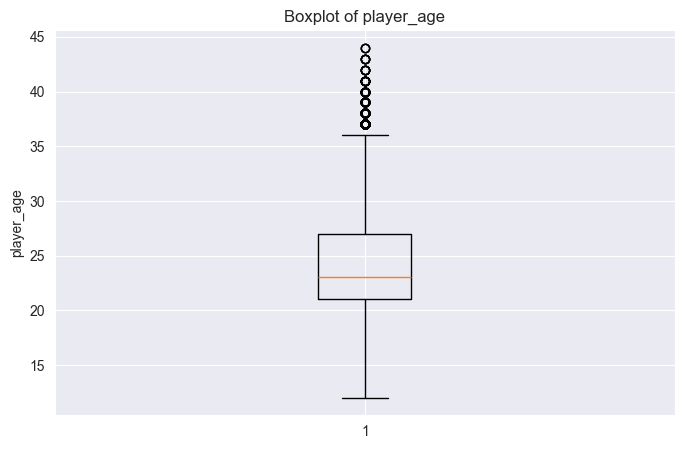

In [16]:
col = 'player_age'

plt.figure(figsize=(8, 5))
plt.boxplot(transfer_df[col], vert=True)
plt.title(f'Boxplot of {col}')
plt.ylabel(col)
plt.show()

Since the boxplot shows a lot of outliers, we looked at the top 20 players with the highest values. Based on our football knowledge, the four players listed make sense to have a high market value. Therefore, we won’t perform any further data cleaning on that column.

In [17]:
# Top 10 player names by market value
col = 'market_val_amnt'
top20_players = transfer_df.sort_values(by=col, ascending=False).head(20)
print("Top 20 players by market value:")
print(top20_players['player_name'].to_string(index=False))

Top 20 players by market value:
  Kylian Mbappé
  Kylian Mbappé
  Kylian Mbappé
  Kylian Mbappé
  Kylian Mbappé
  Kylian Mbappé
  Kylian Mbappé
 Erling Haaland
     Harry Kane
     Harry Kane
     Harry Kane
     Harry Kane
     Harry Kane
     Harry Kane
     Harry Kane
     Harry Kane
     Harry Kane
     Harry Kane
     Harry Kane
Kevin De Bruyne


We realized while looking at the top 20 players by transfer fee amount that the data doesn’t make sense, as it might be an error in the dataset. We will be deleting all the players with a transfer fee of 500 million, as they all have the same value. After that, the next player is Neymar at 220 million. The one listed at 250 million also seems incorrect, so we’re removing that as well.

In [18]:
transfer_df = transfer_df[transfer_df['transfer_fee_amnt'] <= 222000000.0]

In [19]:
col = 'transfer_fee_amnt'
top20_players_fee = transfer_df.sort_values(by=col, ascending=False).head(20)
print("Top 20 players by transfer fee amount:")
print(top20_players_fee['player_name'].to_string(index=False))

Top 20 players by transfer fee amount:
           Neymar
           Neymar
    Kylian Mbappé
    Kylian Mbappé
  Ousmane Dembélé
Philippe Coutinho
  Ousmane Dembélé
Philippe Coutinho
       João Félix
       João Félix
Antoine Griezmann
Antoine Griezmann
    Jack Grealish
    Jack Grealish
Cristiano Ronaldo
Cristiano Ronaldo
    Romelu Lukaku
    Romelu Lukaku
      Eden Hazard
      Eden Hazard


### Resample to LaLiga and Premier League

Format your dataset suitable for your task (combine, merge, resample, …)

In [20]:
transfer_gb1 = transfer_df[transfer_df['league'] == 'GB1']
transfer_es1 = transfer_df[transfer_df['league'] == 'ES1']

In [21]:
transfer_gb1.head(5)

,league,season,window,team_id,team_name,team_country,dir,player_id,player_name,player_age,...,counter_team_id,counter_team_name,counter_team_country,transfer_fee_amnt,market_val_amnt,is_free,is_loan,is_loan_end,is_retired,transfer_id
0,GB1,2009,s,985,Manchester United,England,in,33544,Antonio Valencia,23,...,1071,Wigan Athletic,England,18800000.0,0.0,False,False,False,False,310832
1,GB1,2009,s,985,Manchester United,England,in,62049,Mame Diouf,21,...,687,Molde FK,Norway,4500000.0,1600000.0,False,False,False,False,319841
2,GB1,2009,s,985,Manchester United,England,in,43261,Gabriel Obertan,20,...,40,FC Girondins Bordeaux,France,4000000.0,400000.0,False,False,False,False,315185
3,GB1,2009,s,985,Manchester United,England,in,1397,Michael Owen,29,...,762,Newcastle United,England,0.0,0.0,True,False,False,False,306421
4,GB1,2009,s,985,Manchester United,England,in,73538,Scott Moffatt,18,...,5242,Manchester United U18,England,0.0,0.0,False,False,False,False,339015


### Exploratory Data Analysis

/var/folders/sq/t0n714ls1wz0wbx2mmq780s80000gn/T/ipykernel_58685/2067167180.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(box_data, labels=league_order, vert=True, showfliers=True)


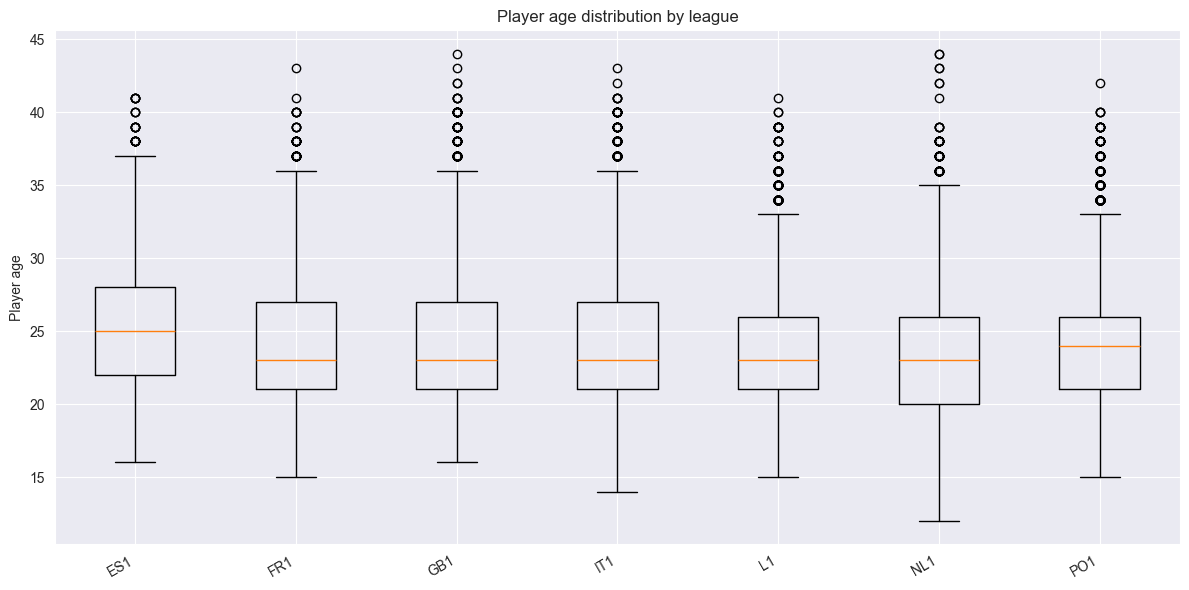

In [22]:
leagues = transfer_df['league'].astype(str)
league_order = sorted(leagues.unique())  # stable order
box_data = [transfer_df.loc[transfer_df['league'] == lg, 'player_age'].values for lg in league_order]

plt.figure(figsize=(12, 6))
plt.boxplot(box_data, labels=league_order, vert=True, showfliers=True)
plt.ylabel('Player age')
plt.title('Player age distribution by league')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

/var/folders/sq/t0n714ls1wz0wbx2mmq780s80000gn/T/ipykernel_58685/2736127508.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_pos.groupby(['league', 'player_pos'])


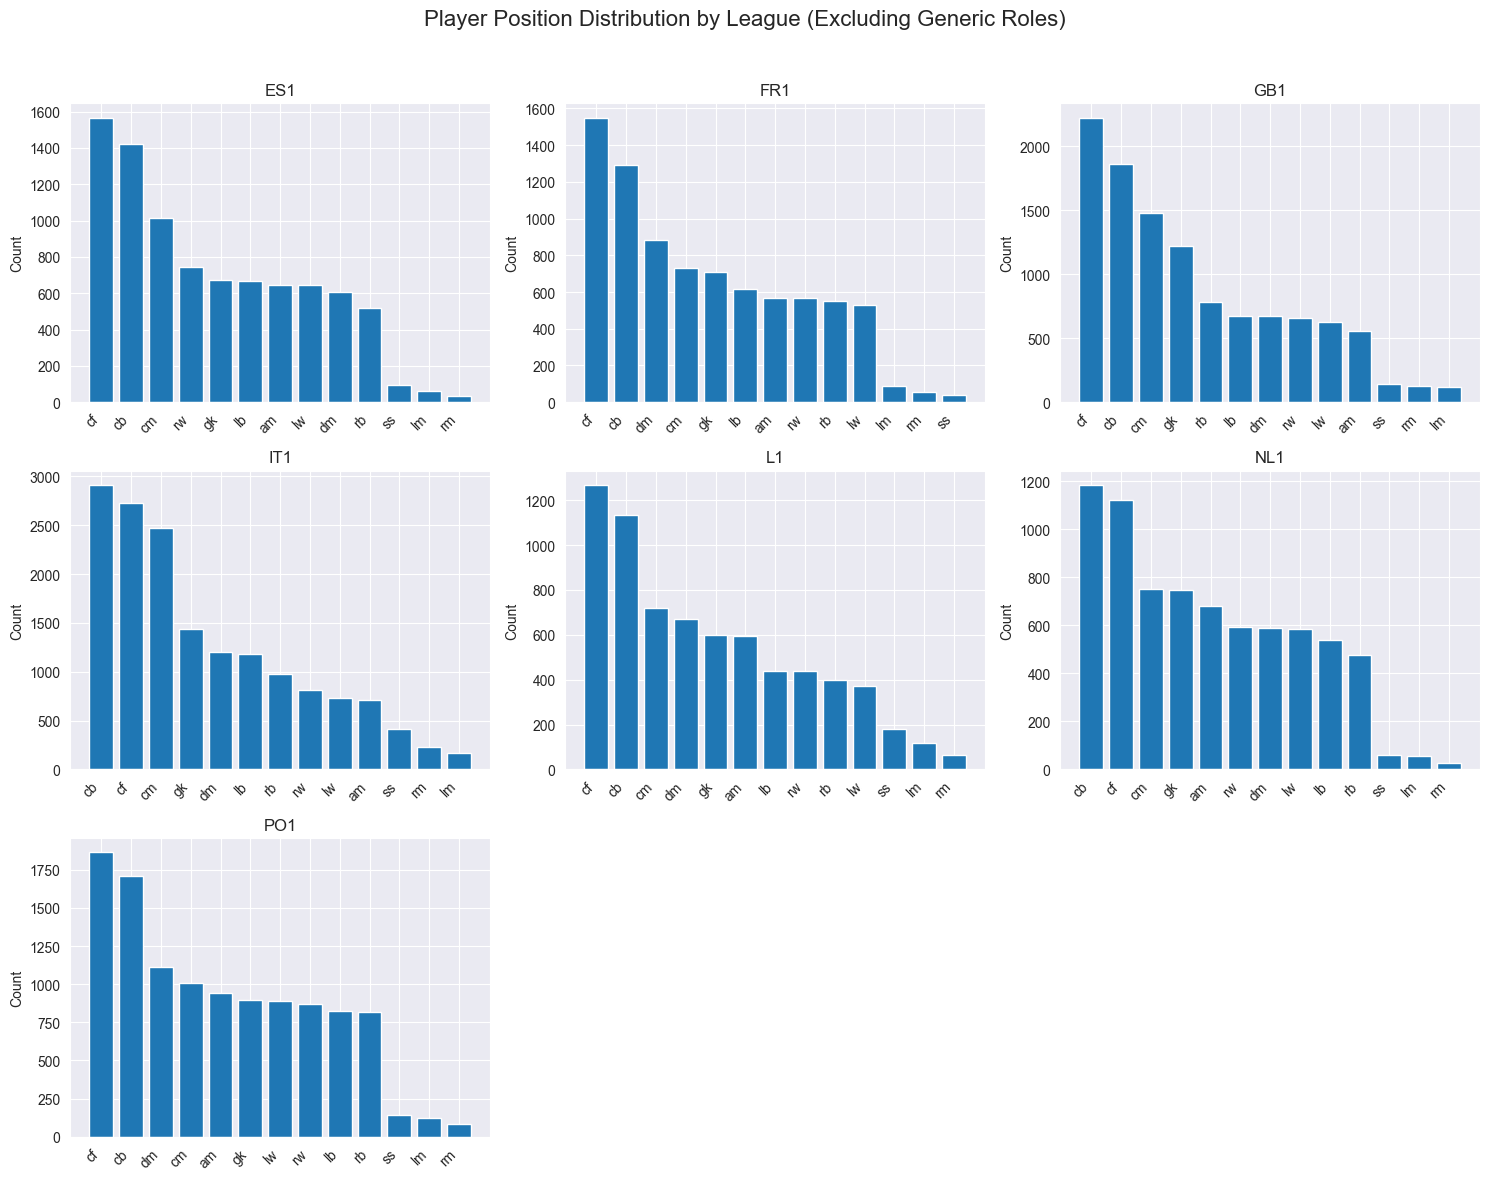

In [23]:
transfer_df['player_pos'] = transfer_df['player_pos'].astype(str).str.strip().str.lower()
df_pos = transfer_df.dropna(subset=['league', 'player_pos'])

exclude_positions = ['defence', 'attack', 'midfield']
df_pos = df_pos[~df_pos['player_pos'].isin(exclude_positions)]

pos_counts = (
    df_pos.groupby(['league', 'player_pos'])
    .size()
    .reset_index(name='count')
)

leagues = sorted(pos_counts['league'].unique())
n_leagues = len(leagues)

# Plot
cols = 3
rows = int(np.ceil(n_leagues / cols))
plt.figure(figsize=(5 * cols, 4 * rows))

for i, lg in enumerate(leagues, 1):
    plt.subplot(rows, cols, i)
    league_data = pos_counts[pos_counts['league'] == lg].sort_values('count', ascending=False)
    plt.bar(league_data['player_pos'], league_data['count'])
    plt.title(lg)
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Count')

plt.suptitle('Player Position Distribution by League (Excluding Generic Roles)', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## Scraping Data

– Find and interact with at least one dynamic element (search bar, buttons, list scroll, filter, ...) 
on the website.



– Use Selenium and BeautifulSoup 

#### Legal Aspect from the website

Bot/Scraping/Crawler Traffic on Sports-Reference.com Sites

Sports Reference is primarily dependent on ad revenue, so we must ensure that actual people using web browsers have the best possible experience when using this site. Unfortunately, non-human traffic, ie bots, crawlers, scrapers, can overwhelm our servers with the number of requests they send us in a short amount of time. Therefore we are implementing rate limiting on the site. We will attempt to keep this page up to date with our current settings.

Currently we will block users sending requests to:

FBref and Stathead sites more often than ten requests in a minute.
our other sites more often than twenty requests in a minute.
This is regardless of bot type and construction and pages accessed.
If you violate this rule your session will be in jail for up to a day.

### Simple Example

In [25]:
URL = "https://fbref.com/en/comps/9/2009-2010/2009-2010-Premier-League-Stats"
TABLE_ID = "results2009-201091_overall"

resp = requests.get(URL, headers={"User-Agent": "Mozilla/5.0"})
resp.raise_for_status()

soup = BeautifulSoup(resp.text, "lxml")
table = soup.find("table", id=TABLE_ID)

headers = [th.get_text(strip=True) for th in table.thead.find_all("th")]

rows = []
for tr in table.tbody.find_all("tr"):
    cells = [td.get_text(strip=True) for td in tr.find_all(["th", "td"])]
    if any(cells):
        rows.append(cells)

df_2009 = pd.DataFrame(rows, columns=headers)

HTTPError: 403 Client Error: Forbidden for url: https://fbref.com/en/comps/9/2009-2010/2009-2010-Premier-League-Stats

In [22]:
df_2009.head(5)

,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,Attendance,Top Team Scorer,Goalkeeper,Notes
0,1,Chelsea,38,27,5,6,103,32,+71,86,2.26,"41,423",Didier Drogba-29,Petr Čech,→ Champions League via league finish
1,2,Manchester Utd,38,27,4,7,86,28,+58,85,2.24,"74,864",Wayne Rooney-26,Edwin van der Sar,→ Champions League via league finish
2,3,Arsenal,38,23,6,9,83,41,+42,75,1.97,"63,256",Cesc Fàbregas-15,Manuel Almunia,→ Champions League via league finish
3,4,Tottenham,38,21,7,10,67,41,+26,70,1.84,"35,794",Jermain Defoe-18,Heurelho Gomes,→ Champions League via league finish
4,5,Manchester City,38,18,13,7,73,45,+28,67,1.76,"45,513",Carlos Tevez-23,Shay Given,→ Europa League via league finish


In [23]:
df_2009[['Top Team Scorer', 'Goals']] = df_2009['Top Team Scorer'].str.extract(r'(.+)-(\d+)', expand=True)

df_2009['Goals'] = df_2009['Goals'].astype(int)

cols = df_2009.columns.tolist()
insert_at = cols.index('Top Team Scorer') + 1
cols.insert(insert_at, cols.pop(cols.index('Goals')))
df_2009 = df_2009[cols]

In [31]:
df_2009.head(5)

,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,Attendance,Top Team Scorer,Goals,Goalkeeper,Notes
0,1,Chelsea,38,27,5,6,103,32,+71,86,2.26,"41,423",Didier Drogba,29,Petr Čech,→ Champions League via league finish
1,2,Manchester Utd,38,27,4,7,86,28,+58,85,2.24,"74,864",Wayne Rooney,26,Edwin van der Sar,→ Champions League via league finish
2,3,Arsenal,38,23,6,9,83,41,+42,75,1.97,"63,256",Cesc Fàbregas,15,Manuel Almunia,→ Champions League via league finish
3,4,Tottenham,38,21,7,10,67,41,+26,70,1.84,"35,794",Jermain Defoe,18,Heurelho Gomes,→ Champions League via league finish
4,5,Manchester City,38,18,13,7,73,45,+28,67,1.76,"45,513",Carlos Tevez,23,Shay Given,→ Europa League via league finish


-----------------------------------

### Scraping 3 Seasons and their Final Standings

From the example above and with help from ChatGPT, we defined a function to extract three seasons from the Premier League’s final standings and scrape them into a single DataFrame.

In [39]:
def scrape_pl_results_overall(season: str) -> pd.DataFrame:
    url = f"https://fbref.com/en/comps/9/{season}/{season}-Premier-League-Stats"
    resp = requests.get(url, headers={"User-Agent": "Mozilla/5.0"})
    resp.raise_for_status()

    soup = BeautifulSoup(resp.text, "lxml")
    table = soup.find("table", id=re.compile(r"^results.*_overall$"))
    if table is None:
        raise ValueError(f"Couldn't find results table for season {season} at {url}")

    headers = [th.get_text(strip=True) for th in table.thead.find_all("th")]

    rows = []
    for tr in table.tbody.find_all("tr"):
        cells = [td.get_text(strip=True) for td in tr.find_all(["th", "td"])]
        if any(cells):
            rows.append(cells)

    return pd.DataFrame(rows, columns=headers)

seasons = ["2013-2014", "2014-2015", "2015-2016"]

df_2013 = scrape_pl_results_overall("2013-2014")
df_2014 = scrape_pl_results_overall("2014-2015")
df_2015 = scrape_pl_results_overall("2015-2016")

In [41]:
df_2013[['Top Team Scorer', 'Goals']] = df_2013['Top Team Scorer'].str.extract(r'(.+)-(\d+)', expand=True)
df_2013['Goals'] = df_2013['Goals'].astype(int)

cols = df_2013.columns.tolist()
insert_at = cols.index('Top Team Scorer') + 1
cols.insert(insert_at, cols.pop(cols.index('Goals')))
df_2013 = df_2013[cols]


df_2014[['Top Team Scorer', 'Goals']] = df_2014['Top Team Scorer'].str.extract(r'(.+)-(\d+)', expand=True)
df_2014['Goals'] = df_2014['Goals'].astype(int)

cols = df_2014.columns.tolist()
insert_at = cols.index('Top Team Scorer') + 1
cols.insert(insert_at, cols.pop(cols.index('Goals')))
df_2014 = df_2014[cols]


df_2015[['Top Team Scorer', 'Goals']] = df_2015['Top Team Scorer'].str.extract(r'(.+)-(\d+)', expand=True)
df_2015['Goals'] = df_2015['Goals'].astype(int)

cols = df_2015.columns.tolist()
insert_at = cols.index('Top Team Scorer') + 1
cols.insert(insert_at, cols.pop(cols.index('Goals')))
df_2015 = df_2015[cols]

In [42]:
df_2013

,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,Attendance,Top Team Scorer,Goals,Goalkeeper,Notes
0,1,Manchester City,38,27,5,6,102,37,+65,86,2.26,"47,080",Yaya Touré,20,Joe Hart,→ Champions League via league finish
1,2,Liverpool,38,26,6,6,101,50,+51,84,2.21,"44,671",Luis Suárez,31,Simon Mignolet,→ Champions League via league finish
2,3,Chelsea,38,25,7,6,71,27,+44,82,2.16,"41,482",Eden Hazard,14,Petr Čech,→ Champions League via league finish
3,4,Arsenal,38,24,7,7,68,41,+27,79,2.08,"60,013",Olivier Giroud,16,Wojciech Szczęsny,→ Champions League via league finish
4,5,Everton,38,21,9,8,61,39,+22,72,1.89,"37,732",Romelu Lukaku,15,Tim Howard,→ Europa League via league finish1
5,6,Tottenham,38,21,6,11,55,51,+4,69,1.82,"35,808",Emmanuel Adebayor,11,Hugo Lloris,→ Europa League via league finish
6,7,Manchester Utd,38,19,7,12,64,43,+21,64,1.68,"75,207",Wayne Rooney,17,David de Gea,
7,8,Southampton,38,15,11,12,54,46,+8,56,1.47,"30,212",Jay Rodriguez,15,Artur Boruc,
8,9,Stoke City,38,13,11,14,45,52,-7,50,1.32,"26,137","Charlie Adam,Peter Crouch",7,Asmir Begović,
9,10,Newcastle Utd,38,15,4,19,43,59,-16,49,1.29,"50,395",Loïc Rémy,14,Tim Krul,
